# Tractor Service Time Prediction.

The data set is a combination of NLP and the Classification problem. its a project based on time pridiction of service for the tractors mechanical parts from the starting point of the service to the ending point. The data is from Tech Mahendra it was assigned as I got a chance to participate in Guvi's Datathon competetion.

In [576]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [577]:
df = pd.read_csv('/content/Predective Analysis of Customer Support.xlsx - ORC2.0 Report.csv')

In [578]:
df.columns

Index(['Project Type', 'Severity of Problem', 'Warrantable/Non Warrantable',
       'Type of ORC', 'Failure Date', 'Problem Definition (Step-1)',
       'Observations (Step-2)', 'System', 'Sub System',
       'Under Analysis (Step-3)', 'Solution Identification & Release (Step-4)',
       'Solution Validation & ORC Closure (Step-5)',
       'Solution Implementation (Step-6)', 'Conclusion and Tracking (Step 7)',
       'ORC Current Status', 'Date of ORC Creation', 'Date to reach at Step 2',
       'Date to reach at Step 3', 'Date to reach at Step 4',
       'Date to reach at Step 5', 'Date to reach at Step 6',
       'Date to reach at Step 7', 'Time to Solution Release (days)',
       'Time to Close the ORC (days)', 'Remarks'],
      dtype='object')

## Project Type

In [579]:
df['Project Type'].isnull().sum()

0

In [580]:
df['Project Type'].head()

0    Regular
1    Regular
2    Regular
3    Regular
4    Regular
Name: Project Type, dtype: object

In [581]:
df['Project Type'].unique()

array(['Regular'], dtype=object)

In [582]:
df.drop(columns='Project Type', inplace = True)
# we are droping as all the rows just has a single term regular.

## Target Variable. Time to Close the ORC (days)

In [583]:
df['Time to Close the ORC (days)'].unique()
# we are checking this to find if there are any 1.5 days.

array([ 36.,  nan,  26.,  48.,  14.,  15.,  29.,  24.,  63.,  22.,  34.,
        50.,  58., 113.,  72.,  59.,  47.,  38.,  60.,  31.,  21.,  13.,
        28.,  54.,  45.,  66.,  82.,  23.,  73.,  56.,  57.,  25.,  30.,
        35.,  17.,  12.,  37., 169.,  10.,  78., 171., 106.,  20.])

In [584]:
df['Time to Close the ORC (days)'].fillna(0,inplace=True)
df['Time to Close the ORC (days)'] = df['Time to Close the ORC (days)'].astype(int)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


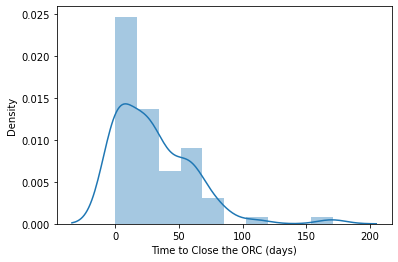

In [585]:
sns.distplot(df['Time to Close the ORC (days)'])

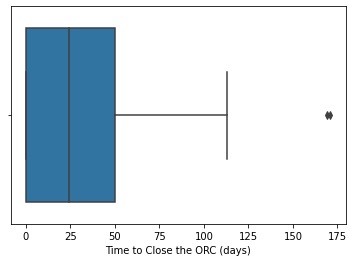

In [586]:
sns.boxplot(x=df['Time to Close the ORC (days)'])

In [587]:
# we definately see a right skew in the data this is because of the null values
# the null value here denotes that the process did not come to an end.
# so we are not droping them as this has some information yet.
# we also see some values in 175 so some process goes that long too.
# we will retain all this data and convert it to a classification problem.
# we can split class by 0, 0-25, 25-50, 50-100, 100+ so 5 classes.

In [588]:
df.shape

(149, 24)

In [589]:
for i in range(149):
  if df['Time to Close the ORC (days)'][i] == 0:
    df['Time to Close the ORC (days)'][i] = '0'
  elif df['Time to Close the ORC (days)'][i] > 0 and df['Time to Close the ORC (days)'][i] < 25:
    df['Time to Close the ORC (days)'][i] = '0 - 25'
  elif df['Time to Close the ORC (days)'][i] > 25 and df['Time to Close the ORC (days)'][i] < 50:
    df['Time to Close the ORC (days)'][i] = '25 - 50'
  elif df['Time to Close the ORC (days)'][i] > 50:
    df['Time to Close the ORC (days)'][i] = '50 - 100'
  else:
    df['Time to Close the ORC (days)'][i] = '100+'


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [590]:
df['Time to Close the ORC (days)'].unique()

array(['25 - 50', '0', '0 - 25', '50 - 100', '100+'], dtype=object)

In [591]:
df = df[df['Time to Close the ORC (days)'] != '100+']

Text(0.5, 0, 'Days')

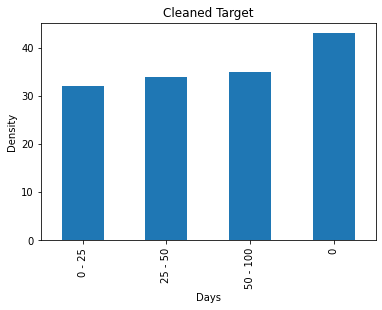

In [592]:
df['Time to Close the ORC (days)'].value_counts(ascending=True).plot.bar()
plt.title('Cleaned Target')
plt.ylabel('Density')
plt.xlabel('Days')

In [593]:
# that has made a clear sepration.
# we can also see the evenedout data at each timeinteravals.
# just that the 0 and 100+ are bit different.
# since the target is clear we can now cleanse the other data wisely.

## 'Severity of Problem'

In [594]:
df['Severity of Problem'].isnull().sum()

0

In [595]:
df['Severity of Problem'].unique()

array([4, 5, 6, 7, 8, 3, 9])

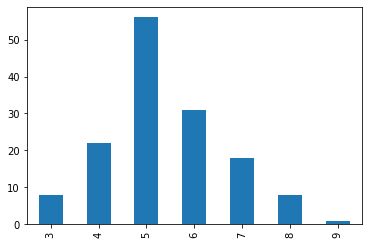

In [596]:
df['Severity of Problem'].value_counts().sort_index().plot.bar()

In [597]:
# this is also a very usefull info to the data so we retain it.
# we can definately see a normal bell curve

In [598]:
df['Severity of Problem'].dtype

dtype('int64')

Text(0.5, 1.0, 'siverity data distributed in each class')

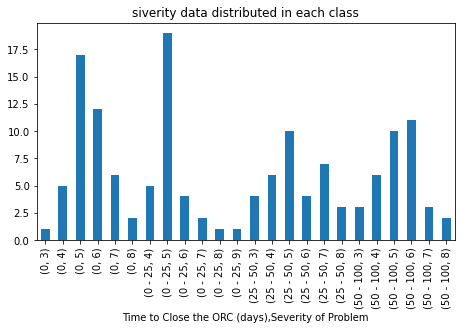

In [599]:
plt.figure(figsize=(7.5,4))
df.groupby(['Time to Close the ORC (days)'])['Severity of Problem'].value_counts().sort_index().plot.bar()
plt.title('siverity data distributed in each class')

In [600]:
# through this we gather that 9 sevierity is very rare and it is often solved in 0 - 25 days.
# we see this column is also of major importance.

In [601]:
df.columns

Index(['Severity of Problem', 'Warrantable/Non Warrantable', 'Type of ORC',
       'Failure Date', 'Problem Definition (Step-1)', 'Observations (Step-2)',
       'System', 'Sub System', 'Under Analysis (Step-3)',
       'Solution Identification & Release (Step-4)',
       'Solution Validation & ORC Closure (Step-5)',
       'Solution Implementation (Step-6)', 'Conclusion and Tracking (Step 7)',
       'ORC Current Status', 'Date of ORC Creation', 'Date to reach at Step 2',
       'Date to reach at Step 3', 'Date to reach at Step 4',
       'Date to reach at Step 5', 'Date to reach at Step 6',
       'Date to reach at Step 7', 'Time to Solution Release (days)',
       'Time to Close the ORC (days)', 'Remarks'],
      dtype='object')

# 'Warrantable/Non Warrantable'

In [602]:
df['Warrantable/Non Warrantable'].unique()

array(['Non Warrantable', 'Warrantable', nan], dtype=object)

In [603]:
mode = df['Warrantable/Non Warrantable'].mode()[0]
df['Warrantable/Non Warrantable'].fillna(mode, inplace=True)

In [604]:
df['Warrantable/Non Warrantable'].isnull().sum()

0

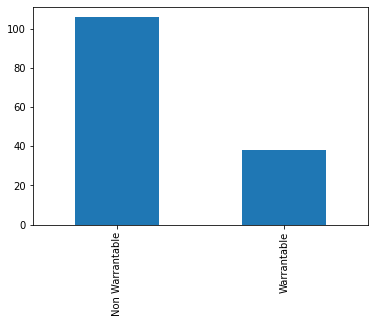

In [605]:
df['Warrantable/Non Warrantable'].value_counts().plot.bar()

In [606]:
# we see that the warantable 

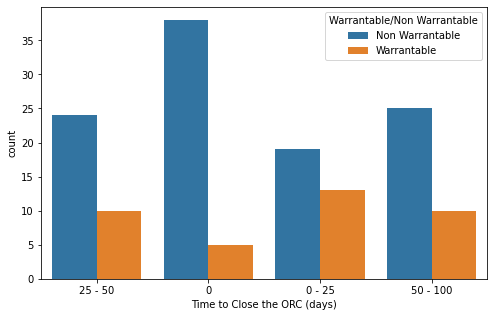

In [607]:
plt.figure(figsize=(8,5))
sns.countplot(x='Time to Close the ORC (days)',data=df,hue ='Warrantable/Non Warrantable')

In [608]:
# we see even amount of data spread in all the classes so we retain.

In [609]:
df['Warrantable/Non Warrantable'] = df['Warrantable/Non Warrantable'].map({'Warrantable': 1,'Non Warrantable':0})

In [610]:
df['Warrantable/Non Warrantable'].unique()

array([0, 1])

# Type of ORC

In [611]:
df['Type of ORC'].unique()

array(['Track', 'Build', 'Field', 'Tear-Down', 'LAB'], dtype=object)

In [612]:
df['Type of ORC'].isnull().sum()

0

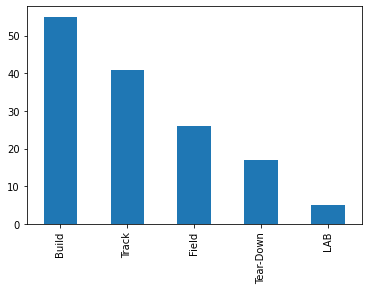

In [613]:
df['Type of ORC'].value_counts().plot.bar()

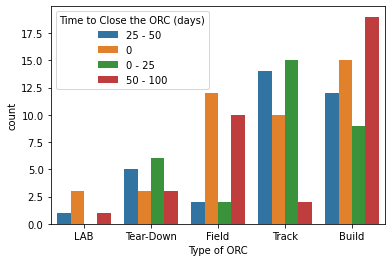

In [614]:
sns.countplot(x=df['Type of ORC'],hue = df['Time to Close the ORC (days)'],order=df['Type of ORC'].value_counts(ascending=True).index)

In [615]:
# since we dont call it as order we will do onehot encoding

In [616]:
df = pd.get_dummies(df,columns=['Type of ORC'])

In [617]:
df.columns

Index(['Severity of Problem', 'Warrantable/Non Warrantable', 'Failure Date',
       'Problem Definition (Step-1)', 'Observations (Step-2)', 'System',
       'Sub System', 'Under Analysis (Step-3)',
       'Solution Identification & Release (Step-4)',
       'Solution Validation & ORC Closure (Step-5)',
       'Solution Implementation (Step-6)', 'Conclusion and Tracking (Step 7)',
       'ORC Current Status', 'Date of ORC Creation', 'Date to reach at Step 2',
       'Date to reach at Step 3', 'Date to reach at Step 4',
       'Date to reach at Step 5', 'Date to reach at Step 6',
       'Date to reach at Step 7', 'Time to Solution Release (days)',
       'Time to Close the ORC (days)', 'Remarks', 'Type of ORC_Build',
       'Type of ORC_Field', 'Type of ORC_LAB', 'Type of ORC_Tear-Down',
       'Type of ORC_Track'],
      dtype='object')

# 'Failure Date'

In [618]:
df['Failure Date'] = pd.DatetimeIndex(df['Failure Date']).month

In [619]:
df['Failure Date'].isnull().sum()

0

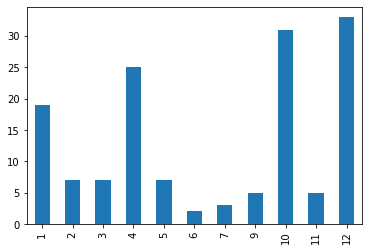

In [620]:
df['Failure Date'].value_counts().sort_index().plot.bar()

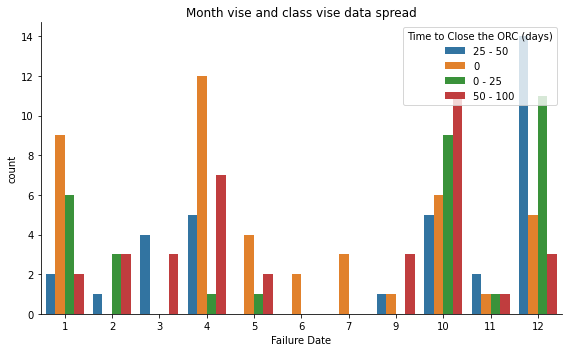

In [621]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['Failure Date'],hue = df['Time to Close the ORC (days)'],order=df['Failure Date'].value_counts().sort_index().index)
plt.title('Month vise and class vise data spread')
sns.despine()
plt.tight_layout()
plt.show()

In [622]:
# we still see even spread and peak months are 1,4,10,12

In [623]:
del df['Failure Date']

In [624]:
df.columns

Index(['Severity of Problem', 'Warrantable/Non Warrantable',
       'Problem Definition (Step-1)', 'Observations (Step-2)', 'System',
       'Sub System', 'Under Analysis (Step-3)',
       'Solution Identification & Release (Step-4)',
       'Solution Validation & ORC Closure (Step-5)',
       'Solution Implementation (Step-6)', 'Conclusion and Tracking (Step 7)',
       'ORC Current Status', 'Date of ORC Creation', 'Date to reach at Step 2',
       'Date to reach at Step 3', 'Date to reach at Step 4',
       'Date to reach at Step 5', 'Date to reach at Step 6',
       'Date to reach at Step 7', 'Time to Solution Release (days)',
       'Time to Close the ORC (days)', 'Remarks', 'Type of ORC_Build',
       'Type of ORC_Field', 'Type of ORC_LAB', 'Type of ORC_Tear-Down',
       'Type of ORC_Track'],
      dtype='object')

# Problem Definition (Step-1)

In [625]:
df['Problem Definition (Step-1)'].isnull().sum()

0

In [626]:
df['Problem Definition (Step-1)'] = df['Problem Definition (Step-1)'].str.replace("[^a-zA-Z0-9]", " ") 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [627]:
df['Problem Definition (Step-1)'] = [i.lower() for i in df['Problem Definition (Step-1)']]

In [628]:
#lemmatize

In [629]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger') 

lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')

def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None


def lemmatize_sentence(sentence):
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  

    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:

            lemmatized_sentence.append(word)
        else:        

            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


df['Problem Definition (Step-1)'] = df['Problem Definition (Step-1)'].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [630]:
#stop word removal

In [631]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
stop_words = stopwords.words('english')

def remove_stopwords(rev):

    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

df['Problem Definition (Step-1)'] = [remove_stopwords(r) for r in df['Problem Definition (Step-1)']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [632]:
df['Problem Definition (Step-1)'].head()

0                                  feed pump foul hood
1    yuv nxt export tractor build aux valve hose pi...
2    oil leakage observe brake drum drain plug lh r...
3    battery tray base plate find bend condition tt...
4    nxt 28 hp 4wd tractor observe vibration steer ...
Name: Problem Definition (Step-1), dtype: object

In [633]:
# data is clean.
# we are leaving it ideal as the other columns might require the useage of this one.

# Observations (Step-2)

In [634]:
df['Observations (Step-2)'].isnull().sum()

30

In [635]:
# we will impute from the previous feature.

In [636]:
df.shape

(144, 27)

In [637]:
for j in range(0,144):
  if type(df.iloc[j,3]) == float:
    df.iloc[j,3] = df.iloc[j,3-1]

In [638]:
df['Observations (Step-2)'].isnull().sum()

0

In [639]:
df['Observations (Step-2)'] = [i.lower() for i in df['Observations (Step-2)']]

In [640]:
df['Observations (Step-2)'] = df['Observations (Step-2)'].str.replace("[^a-zA-Z0-9]", " ") 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [641]:
lemmatizer = WordNetLemmatizer()

def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None


def lemmatize_sentence(sentence):
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  

    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:

            lemmatized_sentence.append(word)
        else:        

            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


df['Observations (Step-2)'] = df['Observations (Step-2)'].apply(lambda x: lemmatize_sentence(x))

In [642]:
stop_words = stopwords.words('english')

def remove_stopwords(rev):

    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

df['Observations (Step-2)'] = [remove_stopwords(r) for r in df['Observations (Step-2)']]

In [643]:
df['Observations (Step-2)'].head()

0                                  feed pump foul hood
1    yuv nxt export tractor build aux valve hose pi...
2    oil leakage observe brake drum drain plugs lh ...
3    battery tray base plate find bend condition tt...
4     orc seprated steer fender aggregate obsolete orc
Name: Observations (Step-2), dtype: object

In [644]:
df.columns

Index(['Severity of Problem', 'Warrantable/Non Warrantable',
       'Problem Definition (Step-1)', 'Observations (Step-2)', 'System',
       'Sub System', 'Under Analysis (Step-3)',
       'Solution Identification & Release (Step-4)',
       'Solution Validation & ORC Closure (Step-5)',
       'Solution Implementation (Step-6)', 'Conclusion and Tracking (Step 7)',
       'ORC Current Status', 'Date of ORC Creation', 'Date to reach at Step 2',
       'Date to reach at Step 3', 'Date to reach at Step 4',
       'Date to reach at Step 5', 'Date to reach at Step 6',
       'Date to reach at Step 7', 'Time to Solution Release (days)',
       'Time to Close the ORC (days)', 'Remarks', 'Type of ORC_Build',
       'Type of ORC_Field', 'Type of ORC_LAB', 'Type of ORC_Tear-Down',
       'Type of ORC_Track'],
      dtype='object')

# 'System'

In [645]:
df['System'].unique()

array(['Engine', 'Hydraulic', 'Transmission', 'Frontal-System',
       'Tractor-System', 'Engine-Integration', 'Electrical', nan,
       'Linkage-System', 'Rear-System', 'Vehicle-Architect'], dtype=object)

In [646]:
df['System'].isnull().sum()

5

In [647]:
mode = df['System'].mode()[0]
df['System'].fillna(mode, inplace=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

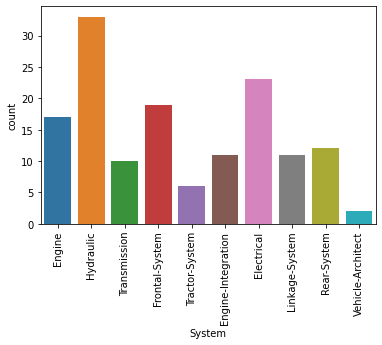

In [648]:
sns.countplot(x=df['System'])
plt.xticks(rotation = 90)

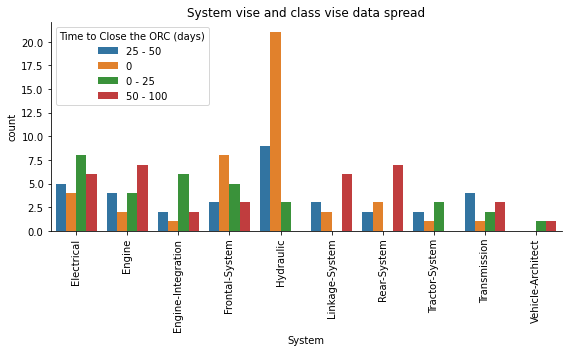

In [649]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['System'],hue = df['Time to Close the ORC (days)'],order=df['System'].value_counts().sort_index().index)
plt.title('System vise and class vise data spread')
plt.xticks(rotation = 90)
sns.despine()
plt.tight_layout()
plt.show()

In [650]:
del df['System']

In [651]:
df.columns

Index(['Severity of Problem', 'Warrantable/Non Warrantable',
       'Problem Definition (Step-1)', 'Observations (Step-2)', 'Sub System',
       'Under Analysis (Step-3)', 'Solution Identification & Release (Step-4)',
       'Solution Validation & ORC Closure (Step-5)',
       'Solution Implementation (Step-6)', 'Conclusion and Tracking (Step 7)',
       'ORC Current Status', 'Date of ORC Creation', 'Date to reach at Step 2',
       'Date to reach at Step 3', 'Date to reach at Step 4',
       'Date to reach at Step 5', 'Date to reach at Step 6',
       'Date to reach at Step 7', 'Time to Solution Release (days)',
       'Time to Close the ORC (days)', 'Remarks', 'Type of ORC_Build',
       'Type of ORC_Field', 'Type of ORC_LAB', 'Type of ORC_Tear-Down',
       'Type of ORC_Track'],
      dtype='object')

# 'Sub System'

In [652]:
df['Sub System'].value_counts().sum()

75

In [653]:
del df['Sub System']

# 'Under Analysis (Step-3)'

In [654]:
df['Under Analysis (Step-3)'].isnull().sum()

25

In [655]:
df.columns

Index(['Severity of Problem', 'Warrantable/Non Warrantable',
       'Problem Definition (Step-1)', 'Observations (Step-2)',
       'Under Analysis (Step-3)', 'Solution Identification & Release (Step-4)',
       'Solution Validation & ORC Closure (Step-5)',
       'Solution Implementation (Step-6)', 'Conclusion and Tracking (Step 7)',
       'ORC Current Status', 'Date of ORC Creation', 'Date to reach at Step 2',
       'Date to reach at Step 3', 'Date to reach at Step 4',
       'Date to reach at Step 5', 'Date to reach at Step 6',
       'Date to reach at Step 7', 'Time to Solution Release (days)',
       'Time to Close the ORC (days)', 'Remarks', 'Type of ORC_Build',
       'Type of ORC_Field', 'Type of ORC_LAB', 'Type of ORC_Tear-Down',
       'Type of ORC_Track'],
      dtype='object')

In [656]:
df.shape

(144, 25)

In [657]:
for j in range(0,144):
  if type(df.iloc[j,4]) == float:
    df.iloc[j,4] = df.iloc[j,3]

In [658]:
df['Under Analysis (Step-3)'].isnull().sum()

0

In [659]:
df['Under Analysis (Step-3)'] = [i.lower() for i in df['Under Analysis (Step-3)']]

In [660]:
df['Under Analysis (Step-3)'] = df['Under Analysis (Step-3)'].str.replace("[^a-zA-Z0-9]", " ") 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [661]:
lemmatizer = WordNetLemmatizer()

def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None


def lemmatize_sentence(sentence):
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  

    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:

            lemmatized_sentence.append(word)
        else:        

            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


df['Under Analysis (Step-3)'] = df['Under Analysis (Step-3)'].apply(lambda x: lemmatize_sentence(x))

In [662]:
stop_words = stopwords.words('english')

def remove_stopwords(rev):

    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

df['Under Analysis (Step-3)'] = [remove_stopwords(r) for r in df['Under Analysis (Step-3)']]

# 'Solution Identification & Release (Step-4)

In [663]:
df['Solution Identification & Release (Step-4)'].isnull().sum()

120

In [664]:
for j in range(0,144):
  if type(df.iloc[j,5]) == float:
    df.iloc[j,5] = df.iloc[j,4]

In [665]:
df['Solution Identification & Release (Step-4)'].isnull().sum()

0

In [666]:
df['Solution Identification & Release (Step-4)'] = [i.lower() for i in df['Solution Identification & Release (Step-4)']]

In [667]:
df['Solution Identification & Release (Step-4)'] = df['Solution Identification & Release (Step-4)'].str.replace("[^a-zA-Z0-9]", " ") 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [668]:
lemmatizer = WordNetLemmatizer()

def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None


def lemmatize_sentence(sentence):
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  

    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:

            lemmatized_sentence.append(word)
        else:        

            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


df['Solution Identification & Release (Step-4)'] = df['Solution Identification & Release (Step-4)'].apply(lambda x: lemmatize_sentence(x))

In [669]:
stop_words = stopwords.words('english')

def remove_stopwords(rev):

    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

df['Solution Identification & Release (Step-4)'] = [remove_stopwords(r) for r in df['Solution Identification & Release (Step-4)']]

# Solution Validation & ORC Closure (Step-5)

In [670]:
df['Solution Validation & ORC Closure (Step-5)'].isnull().sum()

0

In [671]:
df['Solution Validation & ORC Closure (Step-5)'] = [i.lower() for i in df['Solution Validation & ORC Closure (Step-5)']]

In [672]:
df['Solution Validation & ORC Closure (Step-5)'] = df['Solution Validation & ORC Closure (Step-5)'].str.replace("[^a-zA-Z0-9]", " ") 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [673]:
lemmatizer = WordNetLemmatizer()

def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None


def lemmatize_sentence(sentence):
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  

    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:

            lemmatized_sentence.append(word)
        else:        

            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


df['Solution Validation & ORC Closure (Step-5)'] = df['Solution Validation & ORC Closure (Step-5)'].apply(lambda x: lemmatize_sentence(x))

In [674]:
stop_words = stopwords.words('english')

def remove_stopwords(rev):

    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

df['Solution Validation & ORC Closure (Step-5)'] = [remove_stopwords(r) for r in df['Solution Validation & ORC Closure (Step-5)']]

# Solution Implementation (Step-6)

In [675]:
df['Solution Implementation (Step-6)'].isnull().sum()

144

In [676]:
df['Solution Implementation (Step-6)']=df['Solution Validation & ORC Closure (Step-5)']

# Conclusion and Tracking (Step 7)

In [677]:
df['Conclusion and Tracking (Step 7)'].isnull().sum()

144

In [678]:
df['Conclusion and Tracking (Step 7)']=df['Solution Implementation (Step-6)']

In [679]:
df['Conclusion and Tracking (Step 7)'].isnull().sum()

0

# ORC Current Status

In [680]:
df['ORC Current Status'].unique()

array(['Step 7', 'Step 6', 'Obsolete', 'Step 5', 'Step 3', 'Step 3A',
       'Slave ORC', 'Setp1'], dtype=object)

In [681]:
df['ORC Current Status'].isnull().sum()

0

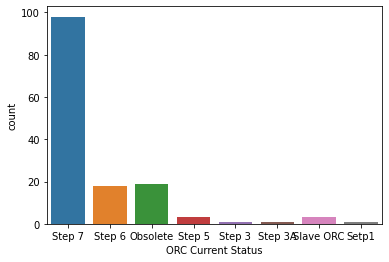

In [682]:
sns.countplot(x=df['ORC Current Status'])

In [683]:
# this feature dose not contribute it rether define the other features so we are droping it.

In [684]:
del df['ORC Current Status']
del df['Severity of Problem']

# 'Dates'

In [685]:
df.columns

Index(['Warrantable/Non Warrantable', 'Problem Definition (Step-1)',
       'Observations (Step-2)', 'Under Analysis (Step-3)',
       'Solution Identification & Release (Step-4)',
       'Solution Validation & ORC Closure (Step-5)',
       'Solution Implementation (Step-6)', 'Conclusion and Tracking (Step 7)',
       'Date of ORC Creation', 'Date to reach at Step 2',
       'Date to reach at Step 3', 'Date to reach at Step 4',
       'Date to reach at Step 5', 'Date to reach at Step 6',
       'Date to reach at Step 7', 'Time to Solution Release (days)',
       'Time to Close the ORC (days)', 'Remarks', 'Type of ORC_Build',
       'Type of ORC_Field', 'Type of ORC_LAB', 'Type of ORC_Tear-Down',
       'Type of ORC_Track'],
      dtype='object')

In [686]:
df.shape

(144, 23)

In [687]:
for i in range(8,15):
  for j in range(0,144):
    if type(df.iloc[j,i]) == float:
      df.iloc[j,i] = df.iloc[j,i-1]

In [688]:
x= df.loc[:,'Date of ORC Creation':'Date to reach at Step 7']
k =list(x.columns)
for i in k:
    df[i] = pd.to_datetime(df[i])


In [689]:
df.reset_index(inplace = True)

In [690]:
df['Date of ORC Creation'].head()

0   2020-12-30 17:49:00
1   2021-05-17 23:42:00
2   2020-12-28 18:31:00
3   2021-02-16 13:19:00
4   2020-10-07 20:03:00
Name: Date of ORC Creation, dtype: datetime64[ns]

In [691]:
df['time to step2'] = (df['Date to reach at Step 2'] - df['Date of ORC Creation'])
df['time to step3'] = (df['Date to reach at Step 3'] - df['Date to reach at Step 2'])
df['time to step4'] = (df['Date to reach at Step 4'] - df['Date to reach at Step 3'])
df['time to step5'] = (df['Date to reach at Step 5'] - df['Date to reach at Step 4'])
df['time to step6'] = (df['Date to reach at Step 6'] - df['Date to reach at Step 5'])
df['time to step7'] = (df['Date to reach at Step 7'] - df['Date to reach at Step 6'])

In [692]:
for i in df.loc[:,'Date of ORC Creation':'Date to reach at Step 7']:
  del df[i]

In [693]:
c = list(df.columns)
c = c[17:23]
c

['time to step2',
 'time to step3',
 'time to step4',
 'time to step5',
 'time to step6',
 'time to step7']

In [694]:
for i in range(len(c)):
  df[c[i]] = df[c[i]] / np.timedelta64(1, 'D')

In [695]:
df.columns

Index(['index', 'Warrantable/Non Warrantable', 'Problem Definition (Step-1)',
       'Observations (Step-2)', 'Under Analysis (Step-3)',
       'Solution Identification & Release (Step-4)',
       'Solution Validation & ORC Closure (Step-5)',
       'Solution Implementation (Step-6)', 'Conclusion and Tracking (Step 7)',
       'Time to Solution Release (days)', 'Time to Close the ORC (days)',
       'Remarks', 'Type of ORC_Build', 'Type of ORC_Field', 'Type of ORC_LAB',
       'Type of ORC_Tear-Down', 'Type of ORC_Track', 'time to step2',
       'time to step3', 'time to step4', 'time to step5', 'time to step6',
       'time to step7'],
      dtype='object')

# Time to Solution Release (days)

In [696]:
df['Time to Solution Release (days)'].isnull().sum()

22

In [697]:
df['Time to Solution Release (days)'].unique()

array([20., 14., 21., nan, 46., 12., 49., 19., 29., 28.,  9., 25., 13.,
       57.,  4., 18., 54., 39., 45., 15., 56., 16.,  6.,  7., 17., 27.,
        8., 42., 58., 55., 78., 62., 65., 24., 48., 11., 35., 52., 44.,
       59., 47., 10., 34., 23., 30., 76.,  3., 26., 22., 31., 97.])

In [698]:
mode = df['Time to Solution Release (days)'].mode()[0]
df['Time to Solution Release (days)'].fillna(mode, inplace=True)

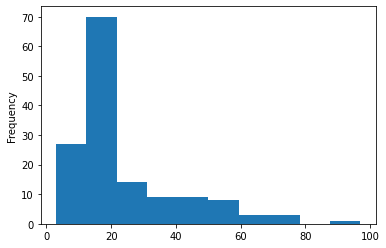

In [699]:
df['Time to Solution Release (days)'].plot.hist()

In [700]:
# it is same as our target and dosenot contribute anything so we will drop

In [701]:
del df['Time to Solution Release (days)']

In [702]:
df.columns

Index(['index', 'Warrantable/Non Warrantable', 'Problem Definition (Step-1)',
       'Observations (Step-2)', 'Under Analysis (Step-3)',
       'Solution Identification & Release (Step-4)',
       'Solution Validation & ORC Closure (Step-5)',
       'Solution Implementation (Step-6)', 'Conclusion and Tracking (Step 7)',
       'Time to Close the ORC (days)', 'Remarks', 'Type of ORC_Build',
       'Type of ORC_Field', 'Type of ORC_LAB', 'Type of ORC_Tear-Down',
       'Type of ORC_Track', 'time to step2', 'time to step3', 'time to step4',
       'time to step5', 'time to step6', 'time to step7'],
      dtype='object')

# 'Remarks'

In [703]:
df['Remarks'].isnull().sum()

23

In [704]:
df['Remarks'].fillna('Nil', inplace=True)

In [705]:
df['Remarks'].isnull().sum()

0

In [706]:
df['Remarks'] = [i.lower() for i in df['Remarks']]

In [707]:
df['Remarks'] = df['Remarks'].str.replace("[^a-zA-Z0-9]", " ") 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [708]:
lemmatizer = WordNetLemmatizer()

def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None


def lemmatize_sentence(sentence):
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  

    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:

            lemmatized_sentence.append(word)
        else:        

            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


df['Remarks'] = df['Remarks'].apply(lambda x: lemmatize_sentence(x))

In [709]:
stop_words = stopwords.words('english')

def remove_stopwords(rev):

    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

df['Remarks'] = [remove_stopwords(r) for r in df['Remarks']]

In [710]:
df.columns

Index(['index', 'Warrantable/Non Warrantable', 'Problem Definition (Step-1)',
       'Observations (Step-2)', 'Under Analysis (Step-3)',
       'Solution Identification & Release (Step-4)',
       'Solution Validation & ORC Closure (Step-5)',
       'Solution Implementation (Step-6)', 'Conclusion and Tracking (Step 7)',
       'Time to Close the ORC (days)', 'Remarks', 'Type of ORC_Build',
       'Type of ORC_Field', 'Type of ORC_LAB', 'Type of ORC_Tear-Down',
       'Type of ORC_Track', 'time to step2', 'time to step3', 'time to step4',
       'time to step5', 'time to step6', 'time to step7'],
      dtype='object')

# Word Cloud

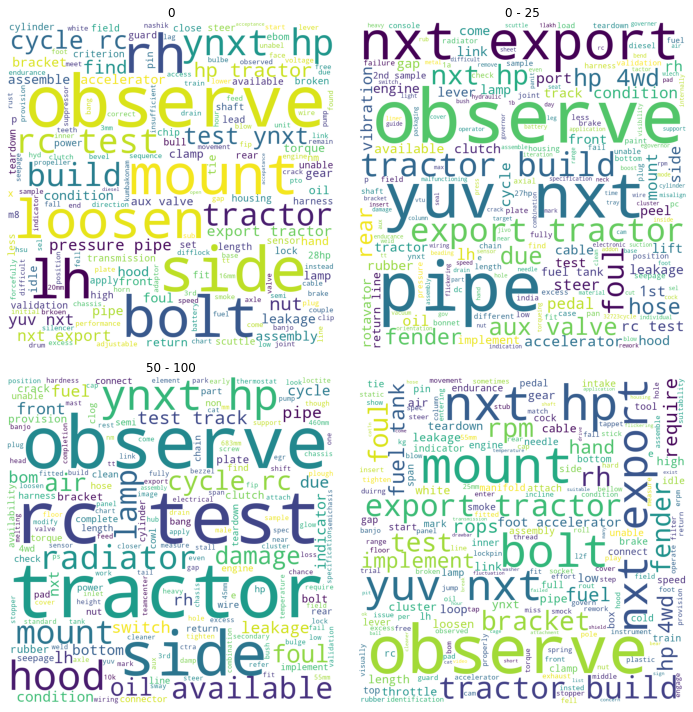

In [711]:
d = list(df['Time to Close the ORC (days)'].unique())
plt.figure(figsize = (10, 10), facecolor = None) 
for i in range(len(d)):
  from wordcloud import WordCloud
  word_cloud_df = df.loc[df['Time to Close the ORC (days)'] == d[i],:]
  all_words = ' '.join([text for text in word_cloud_df['Problem Definition (Step-1)']])
  

  wordcloud = WordCloud(width = 800, height = 800, 
                        background_color ='white', 
                        min_font_size = 10).generate(all_words)

  #plot the WordCloud image                        
  plt.title(d[i])
  plt.subplot(2,2,i+1)
  plt.imshow(wordcloud) 
  plt.axis("off") 
plt.tight_layout() 
plt.show()

# Merging

In [712]:
li = df.iloc[:,2:9]
l = list(li.columns)
l.append('Remarks')
l

['Problem Definition (Step-1)',
 'Observations (Step-2)',
 'Under Analysis (Step-3)',
 'Solution Identification & Release (Step-4)',
 'Solution Validation & ORC Closure (Step-5)',
 'Solution Implementation (Step-6)',
 'Conclusion and Tracking (Step 7)',
 'Remarks']

In [713]:
from sklearn.feature_extraction.text import TfidfVectorizer

for i in range(len(l)):
  tfidf = TfidfVectorizer(max_features=500)
  t = tfidf.fit_transform(df[l[i]])

  feature_names = tfidf.get_feature_names()

  redf = pd.DataFrame(t.toarray(), columns = feature_names)
  df = df.merge(redf.add_suffix(i),left_index=True,right_index=True)
  del df[l[i]]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Target to numeric

In [714]:
df['Time to Close the ORC (days)'].unique()

array(['25 - 50', '0', '0 - 25', '50 - 100'], dtype=object)

In [715]:
cmap = {'25 - 50':2, '0':0, '0 - 25':1, '50 - 100':3}
df['Time to Close the ORC (days)'].replace(cmap,inplace=True)

In [716]:
del df['index']

In [717]:
df.reset_index(inplace = True,drop = True)

# ML

In [718]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x = df.drop(columns=['Time to Close the ORC (days)'])
y = df['Time to Close the ORC (days)']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.15)
x_train.shape

(122, 2848)

In [719]:
from sklearn import linear_model

logreg = linear_model.LogisticRegression()
logreg.fit(x_train, y_train)
print('intercept:', logreg.intercept_)
print('coefficients:', logreg.coef_)

intercept: [ 7.82518841  3.83475168 -2.41396436 -9.24597572]
coefficients: [[-0.23835395 -0.04783626  0.03437629 ...  0.          0.00438058
   0.00488711]
 [ 0.28412999  0.25759671 -0.14171863 ...  0.         -0.02194409
  -0.05869152]
 [-0.0179764  -0.20831971 -0.03535143 ...  0.          0.0051456
   0.03577605]
 [-0.02779965 -0.00144075  0.14269376 ...  0.          0.0124179
   0.01802836]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [720]:
print(logreg.score(x_test,y_test))

0.8181818181818182


# Knn model

In [721]:
x = df.drop(columns=['Time to Close the ORC (days)'])
y = df['Time to Close the ORC (days)']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.15)
x_train.shape

(122, 2848)

In [722]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [723]:
# p = []
# for i in range(1,30): 
#   for j in range(4,10): 
#     p.append((str(i)+str(j)))

In [724]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

score = -70
l = 0
for i in range(1,30): # best K_value
  # for j in range(4,10):
    #print(round(((p.index(str(i)+str(j)))/114)*100)) # model compleation percentage
    knn = KNeighborsClassifier(i)
    knn.fit(x_train,y_train)
    s = np.mean(cross_val_score(knn, x_train, y_train, cv=9))#j)) # mean cv_score
    t = knn.score(x_test,y_test)
    if s > score and t > s: # condition to block overfit.
      score = s
      l = i
      # c = j

In [725]:
print('The best score obtained = ',score)
print('The best Nearest Neighbors =',l)#,'\nThe best cross validation fold =',c)

The best score obtained =  0.40293040293040294
The best Nearest Neighbors = 1


In [726]:
knn = KNeighborsClassifier(l)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [727]:
la = list(df['Time to Close the ORC (days)'].unique())

Confusion matrix:
 [[5 1 0 0]
 [2 1 2 2]
 [3 0 1 2]
 [1 0 0 2]]


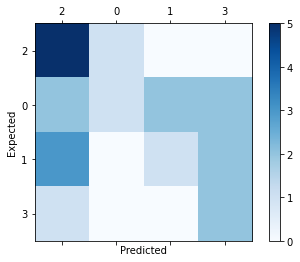

In [728]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = la
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [729]:
# KNN has poorly performed

# Decision Tree Model

In [730]:
x = df.drop(columns=['Time to Close the ORC (days)'])
y = df['Time to Close the ORC (days)']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.15)
x_train.shape

(122, 2848)

In [731]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [732]:
from sklearn.tree import DecisionTreeClassifier
score = -80
l = 0
for i in range(1,30):
    dt = DecisionTreeClassifier(max_depth=i)
    dt.fit(x_train, y_train)
    s = np.mean(cross_val_score(dt, x_train, y_train, cv=9)) # mean cv_score
    t = dt.score(x_test, y_test)
    if s > score and t > s:# condition to block overfit.
      score = s
      l = i

In [733]:
print('The best score obtained = ',score.round(2))
print('The best depth =',l)

The best score obtained =  0.83
The best depth = 12


In [734]:
dt = DecisionTreeClassifier(max_depth=l)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

Confusion matrix:
 [[10  0  0  0]
 [ 0  4  1  0]
 [ 0  2  2  1]
 [ 0  0  0  2]]


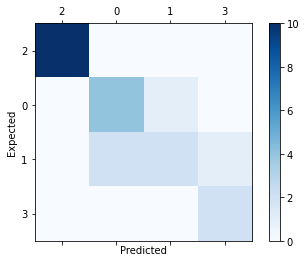

In [735]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = la
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

# Random forest model

In [736]:
x = df.drop(columns=['Time to Close the ORC (days)'])
y = df['Time to Close the ORC (days)']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.15)
x_train.shape

(122, 2848)

In [737]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [738]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
score=-80
for i in range(1,20):
  rf = RandomForestClassifier(n_estimators= 100, max_depth = i, max_features='sqrt')
  rf.fit(x_train, y_train)
  s = np.mean(cross_val_score(rf, x_train, y_train, cv=9)) # mean cv_score
  t = rf.score(x_test, y_test)
  if s > score and t > s:# condition to block overfit.
    score = s
    l = i

In [739]:
print('The best score obtained = ',score.round(2))
print('The best depth =',l)

The best score obtained =  0.6
The best depth = 8


In [740]:
rf = RandomForestClassifier(n_estimators= 100, max_depth = l, max_features='sqrt')
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

Confusion matrix:
 [[5 0 0 1]
 [0 1 4 0]
 [3 0 3 1]
 [1 1 0 2]]


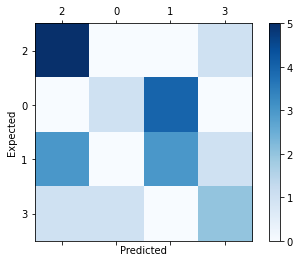

In [741]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = la
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

# XG-Boost

In [742]:
x = df.drop(columns=['Time to Close the ORC (days)'])
y = df['Time to Close the ORC (days)']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.15)
x_train.shape

(122, 2848)

In [743]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [744]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
score = -70
l = 0
for lr in np.arange(0.01, 0.35, 0.01):
  lr = round(lr,2)
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0)
  model.fit(x_train, y_train) 
  s = np.mean(cross_val_score(model, x_train, y_train, cv=10))
  t = model.score(x_test, y_test)
  if s > score and t > s:
    score = s
    l = lr
print('The best score obtained = ',score)
print('The learning rate =',l)

The best score obtained =  0.8685897435897436
The learning rate = 0.16


In [745]:
model = xgb.XGBClassifier(learning_rate = l, n_estimators=100, verbosity = 0)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

Confusion matrix:
 [[8 0 0 0]
 [0 2 0 0]
 [0 0 3 1]
 [0 0 1 7]]


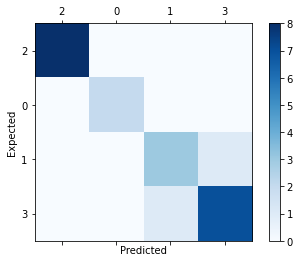

In [747]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = la
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()